In [44]:
import pandas as pd

In [45]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/feature_extract_04.csv")
dataset.head()

,Artist,Title,Label,song_path,extracted_chorus_path,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,popular/Blinding Lights.mp3,chorus_extract/Blinding Lights.wav,0.476192,0.016697,1.0,0.290165,0.473183,...,0.007436,0.000934,-0.539747,1.466814,0.037551,0.159229,0.020931,0.082646,0.079751,3.242503
1,Olivia Rodrigo,Good 4 U,1,popular/Good 4 U.mp3,chorus_extract/Good 4 U.wav,1.048281,0.006909,1.0,0.274690,0.347730,...,-0.010380,-0.011803,0.115312,-0.398137,0.054286,0.224626,0.035255,0.147474,0.157392,-0.313862
2,Olivia Rodrigo,Drivers License,1,popular/Drivers License.mp3,chorus_extract/Drivers License.wav,1.399714,0.000636,1.0,0.307648,0.236694,...,-0.000745,-0.010594,0.422336,0.783507,0.022902,0.175873,0.031743,0.076301,0.065442,-0.074665
3,Lil Nas X,Montero (Call Me By Your Name),1,popular/Montero (Call Me By Your Name).mp3,chorus_extract/Montero (Call Me By Your Name).wav,0.898662,0.002983,1.0,0.239849,0.300356,...,-0.013886,-0.021088,0.467516,0.528719,0.048934,0.266757,0.043461,0.143693,0.137687,-0.347516
4,BTS,Butter,1,popular/Butter.mp3,chorus_extract/Butter.wav,0.299845,0.036609,1.0,0.334760,0.521782,...,0.006860,0.004859,-0.384372,2.536822,0.040181,0.221769,0.027223,0.095766,0.090703,7.626171


In [46]:
dataset.shape

(792, 523)

### Drop unnecessary columns which are dataset['song_path'] and dataset['extracted_chorus_path']

In [47]:
dataset = dataset.drop('song_path', axis=1).drop('extracted_chorus_path', axis=1)
dataset.head()

,Artist,Title,Label,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,0.476192,0.016697,1.0,0.290165,0.473183,0.422056,-0.920438,...,0.007436,0.000934,-0.539747,1.466814,0.037551,0.159229,0.020931,0.082646,0.079751,3.242503
1,Olivia Rodrigo,Good 4 U,1,1.048281,0.006909,1.0,0.274690,0.347730,0.255082,0.136358,...,-0.010380,-0.011803,0.115312,-0.398137,0.054286,0.224626,0.035255,0.147474,0.157392,-0.313862
2,Olivia Rodrigo,Drivers License,1,1.399714,0.000636,1.0,0.307648,0.236694,0.088057,0.757593,...,-0.000745,-0.010594,0.422336,0.783507,0.022902,0.175873,0.031743,0.076301,0.065442,-0.074665
3,Lil Nas X,Montero (Call Me By Your Name),1,0.898662,0.002983,1.0,0.239849,0.300356,0.262127,0.231711,...,-0.013886,-0.021088,0.467516,0.528719,0.048934,0.266757,0.043461,0.143693,0.137687,-0.347516
4,BTS,Butter,1,0.299845,0.036609,1.0,0.334760,0.521782,0.451320,-1.433215,...,0.006860,0.004859,-0.384372,2.536822,0.040181,0.221769,0.027223,0.095766,0.090703,7.626171


### Figure 1. Pair plot of the median value of all major audio features

In [48]:
import seaborn as sns

columns = dataset.columns
median_columns = ['Label']
for column in columns:
    if column .count('median_0') > 0:
        median_columns.append(column)

sns.pairplot(dataset[median_columns], hue='Label')

Output hidden; open in https://colab.research.google.com to view.

### Plot explained variance & Make biplot with the number of features with pca library.

In [ ]:
!pip install pca

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [518] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [172] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [518] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[172]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


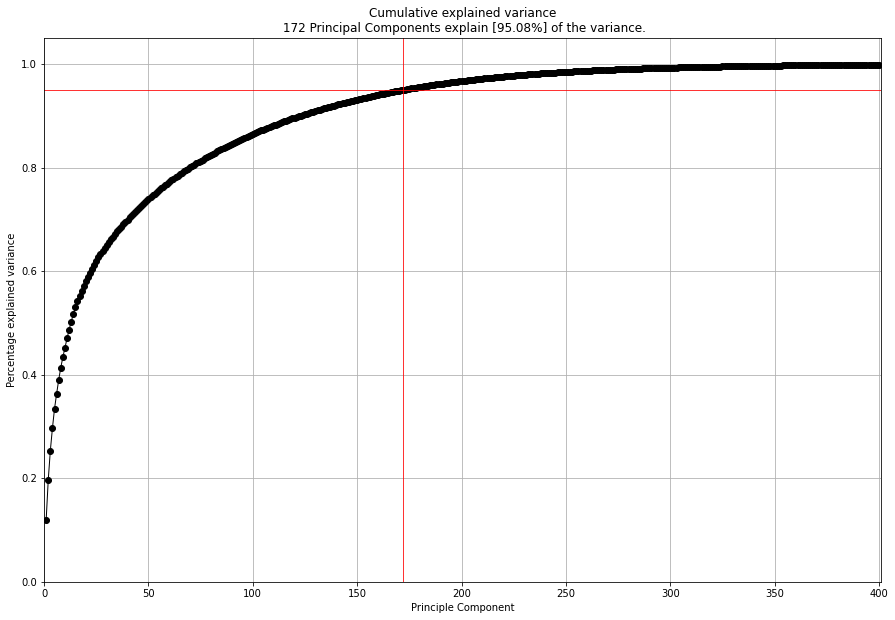

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

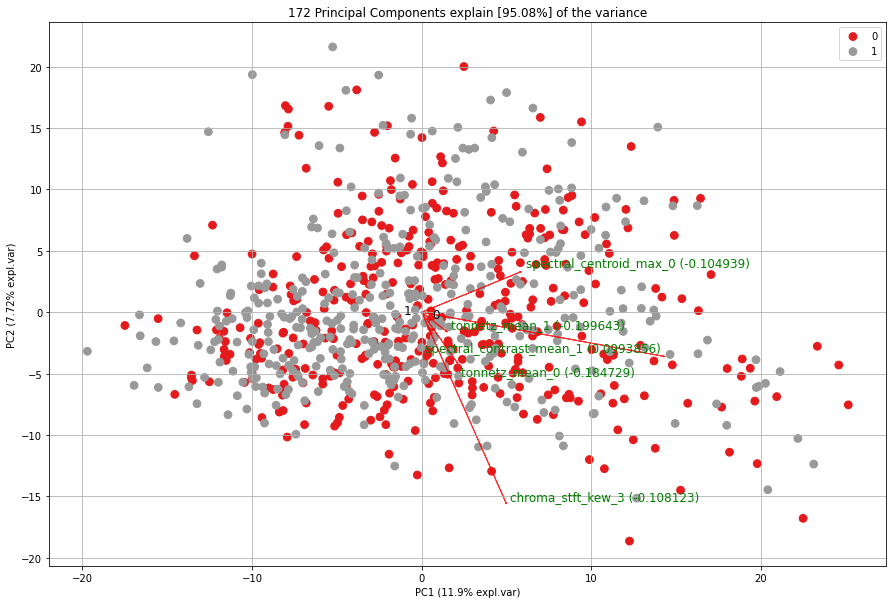

In [49]:
from pca import pca

X = dataset.drop('Artist', axis=1).drop('Title',axis=1).drop('Label', axis=1)

# Initialize to reduce the data up to the nubmer of componentes that explains 95% of the variance.
model = pca(normalize=True)

# Fit transform
out = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot(n_components=400)

# Make biplot with the number of features
fig, ax = model.biplot(y=dataset['Label'], n_feat=5)

### Find best feature which we will use & these features which reach variance to 95%

In [50]:
# print(out['topfeat'])

df = pd.DataFrame(out['topfeat'])
df[df['type']=='best']

,PC,feature,loading,type
0,PC1,spectral_contrast_mean_1,0.099386,best
1,PC2,chroma_stft_kew_3,-0.108123,best
2,PC3,spectral_centroid_max_0,-0.104939,best
3,PC4,tonnetz_mean_0,-0.184729,best
4,PC5,tonnetz_mean_1,-0.199643,best
...,...,...,...,...
167,PC168,chroma_cqt_kurtosis_11,-0.168690,best
168,PC169,chroma_cens_kurtosis_0,-0.227442,best
169,PC170,spectral_contrast_min_0,-0.221604,best
170,PC171,spectral_contrast_min_4,-0.207163,best


### Take X and y variables to training the model

In [51]:
columns = list(df['feature'][df['type']=='best'])
X = dataset[columns]
y = dataset['Label']

### Split the into X_train, X_test, y_train, y_test with test_size=0.2 and train_size=0.8

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

### Build two methods:
- `First:- metrics:` to store metrics for all models.
- `Second:- training ` to train all models.

In [53]:
import warnings
warnings.filterwarnings('ignore')
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import f1_score, precision_score, recall_score, plot_confusion_matrix

dic = []

def metrics(name, model, X_train, y_train, X_test, y_test, y_pred):
    dic.append({
        'name': name,
        'train acc': model.score(X_train, y_train),
        'test acc': model.score(X_test, y_test),

        'f1 train acc': f1_score(y_train, model.predict(X_train)),
        'f1 test acc': f1_score(y_test, y_pred),

        'precision train acc': precision_score(y_train, model.predict(X_train)),
        'precision test acc': precision_score(y_test, y_pred),

        'recall train acc': recall_score(y_train, model.predict(X_train)),
        'recall test acc': recall_score(y_test, y_pred)
    })

def training(model, X_train, y_train, X_test, y_test, name):
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # mse, bias, var = bias_variance_decomp(model, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=random)

    metrics(name, clf, X_train, y_train, X_test, y_test, y_pred)

    return clf


### Build ML models which are 
- GradientBoostingClassifier         (GBC_model)
- LinearDiscriminantAnalysis         (LDA_model)
- AdaBoostClassifier                 (Ada_model)
- K-Nearest Neighbour Classifier     (KNN_model)


In [54]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


GBC_model = training(GradientBoostingClassifier(), X_train, y_train, X_test, y_test, 'GBC')
LDA_model = training(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test, 'LDA')
Ada_model = training(AdaBoostClassifier(), X_train, y_train, X_test, y_test, 'Ada')
KNN_model = training(KNeighborsClassifier(n_neighbors=7), X_train, y_train, X_test, y_test, 'KNN')

### Convert metrixs into DataFrame

In [55]:
df = pd.DataFrame(dic)
df

,name,train acc,test acc,f1 train acc,f1 test acc,precision train acc,precision test acc,recall train acc,recall test acc
0,GBC,1.000000,0.509434,1.000000,0.518519,1.000000,0.525000,1.000000,0.512195
1,LDA,0.704581,0.515723,0.707355,0.533333,0.701863,0.530120,0.712934,0.536585
2,Ada,0.846761,0.496855,0.847244,0.500000,0.845912,0.512821,0.848580,0.487805
3,KNN,0.635071,0.540881,0.630400,0.562874,0.639610,0.552941,0.621451,0.573171


### See different between `train acc`, `test acc` in train and validation.

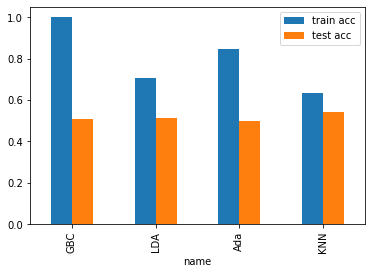

In [56]:
df.plot(x = 'name', y = ['train acc', 'test acc'], kind = 'bar')

### See different between `f1 train acc`, `f1 test acc` in train and validation.

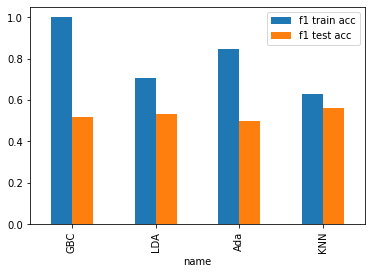

In [57]:
df.plot(x = 'name', y = ['f1 train acc', 'f1 test acc'], kind = 'bar')

### See different between `precision train acc`, `precision test acc` in train and validation.

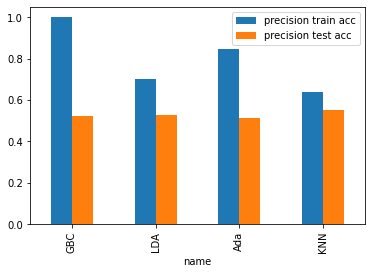

In [58]:
df.plot(x = 'name', y = ['precision train acc', 'precision test acc'], kind = 'bar')

### See different between `recall train acc`, `recall test acc` in train and validation.

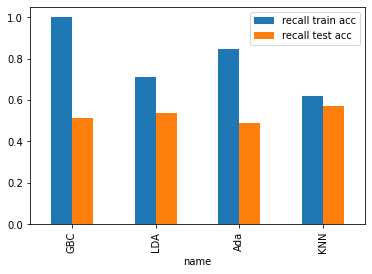

In [59]:
df.plot(x = 'name', y = ['recall train acc', 'recall test acc'], kind = 'bar')

### Save all models

In [60]:
import pickle

pickle.dump(GBC_model, open('/content/drive/MyDrive/Colab Notebooks/GBC_model', 'wb'))
pickle.dump(LDA_model, open('/content/drive/MyDrive/Colab Notebooks/LDA_model', 'wb'))
pickle.dump(Ada_model, open('/content/drive/MyDrive/Colab Notebooks/Ada_model', 'wb'))
pickle.dump(KNN_model, open('/content/drive/MyDrive/Colab Notebooks/KNN_model', 'wb'))